<a href="https://colab.research.google.com/github/septianytup/dermalab-sales-performance-analytics/blob/main/Python_Marketing_Campaign_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Optimization**

# **Project Overview**

iFood adalah perusahaan retail makanan yang menawarkan berbagai kategori produk, termasuk produk premium. Perusahaan melayani pelanggan melalui toko fisik, katalog, dan platform website.

Selama beberapa tahun terakhir, kinerja pendapatan perusahaan relatif stabil. Namun, pertumbuhan di masa depan diperkirakan akan melambat. Oleh karena itu, project ini difokuskan untuk membantu iFood menjalankan campaign produk baru dengan pendekatan yang lebih terarah, yaitu dengan memusatkan anggaran pemasaran pada pelanggan yang memiliki potensi kontribusi revenue paling besar.

Sebagai bagian dari analisis, sebanyak 2.240 pelanggan digunakan sebagai dasar untuk membangun model dan menyusun strategi targeting yang lebih efektif, sehingga campaign dapat dijalankan dengan lebih efisien dan berdampak secara bisnis.

# **Business Objectives**

Tujuan utama dari project ini meliputi:

- Menentukan pelanggan yang paling berpeluang merespons campaign
- Mengarahkan campaign pada pelanggan dengan nilai bisnis tertinggi
- Meningkatkan efisiensi anggaran melalui strategi targeting yang lebih tepat
- Mendukung aktivitas upsell dan menjaga hubungan jangka panjang dengan pelanggan

Keberhasilan campaign tidak hanya diukur dari tingkat respons, tetapi dari sejauh mana campaign mampu memberikan kontribusi nyata terhadap revenue perusahaan.

# **Data Understanding, Data Cleaning,  Exploratory Data Analysis (EDA)**

In [1]:
# Import Library Utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan Tampilan & Visualisasi
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Google Drive (Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
df = pd.read_csv('/content/drive/My Drive/Datasets Collection/marketing_data.csv')

df.head()

Mounted at /content/drive


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [3]:
# Quick Data Inspection
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

**Summary Insight - Initial Data Inspection & Data Cleaning**


*   Dataset terdiri dari 2.240 baris dan 28 kolom.
*   Beberapa nama kolom mengandung spasi.
*   Kolom Income bertipe 'object'.
*   Kolom Dt_Customer bertipe 'object'.

In [4]:
# Menghapus Spasi pada Nama Kolom
df.columns = df.columns.str.replace(' ', '')

# Cleaning Kolom Income
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].astype('float')

# Konversi Tanggal
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [5]:
# Cek Duplikat Data
df.duplicated().sum()

np.int64(0)

In [6]:
# Cek Missing Values
df.isna().sum().sort_values(ascending=False)

,0
Income,24
ID,0
Education,0
Year_Birth,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Summary Insight - Duplicate & Missing Values Check**


*   Tidak ditemukan baris duplikat pada dataset.
*   Kolom Income memiliki 24 missing values.





<Axes: xlabel='Income'>

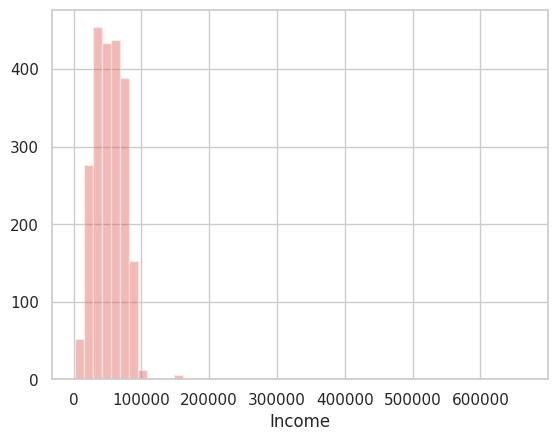

In [7]:
# Distribusi Income
sns.distplot(df['Income'], kde=False, hist=True)

<Axes: >

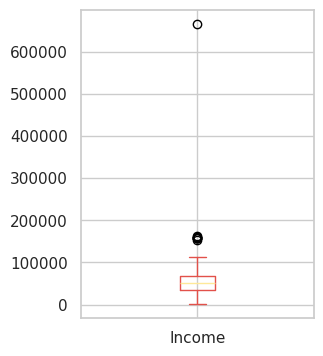

In [8]:
# Boxplot Income (Outlier Detection)
df['Income'].plot(kind='box', figsize=(3,4))

**Summary Insight - Income**


*   Distribusi Income menunjukkan pola right-skewed.
*   Mayoritas customer berada pada tingkat income menengah.
*   Terdapat sejumlah customer dengan income sangat tinggi (outliers).
*   Karena adanya outlier dan distribusi yang tidak simetris, mean tidak representatif sebagai ukuran data pusat, sehingga missing Income diimputasi menggunakan median.

In [9]:
# Imputasi Missing Income
df['Income'] = df['Income'].fillna(df['Income'].median())

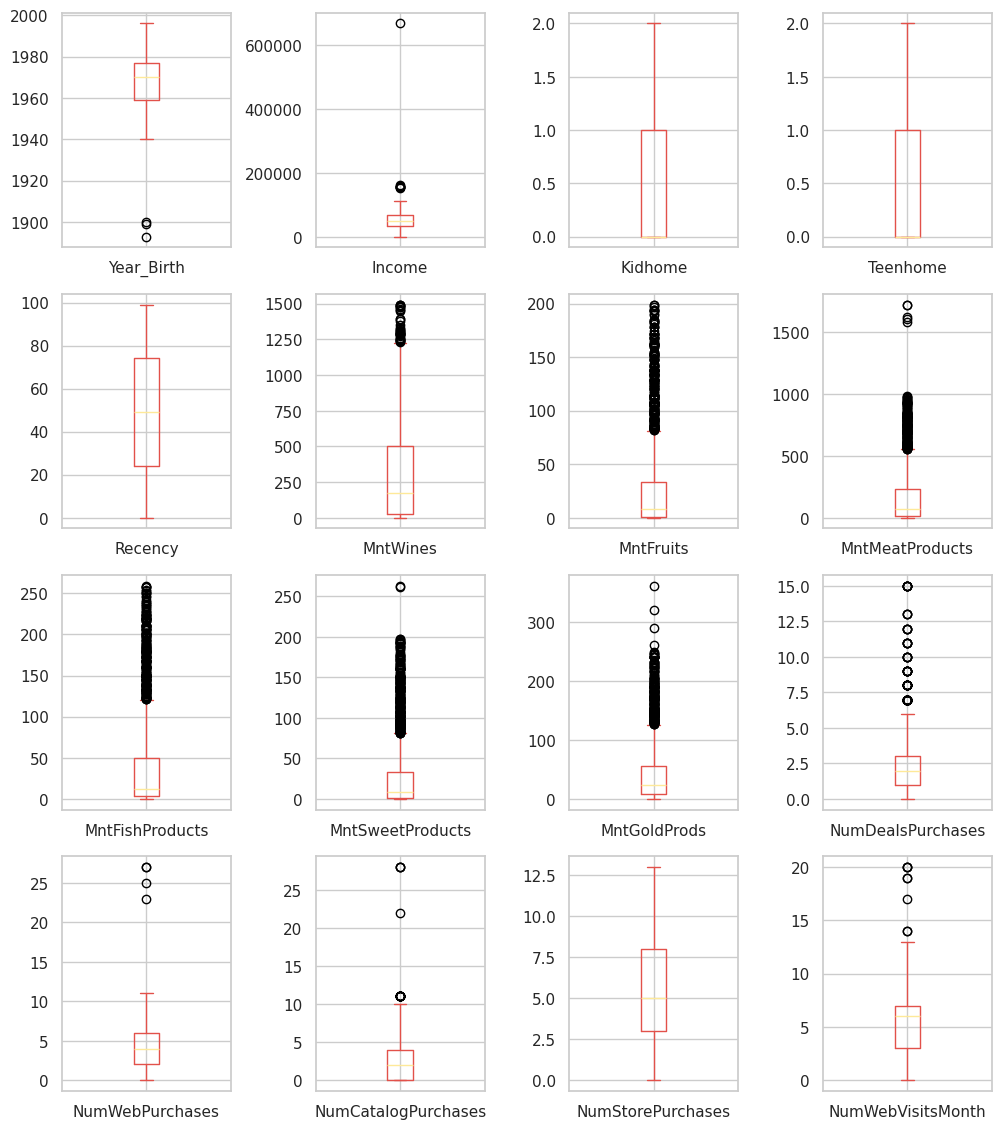

In [10]:
# Mengambil Kolom Data Numerik
df_to_plot = df.select_dtypes(include=['float', 'int'])

# Drop Kolom Tidak Relevan untuk Distribusi
df_to_plot.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],
                inplace=True)

# Boxplot Semua Fitur Numerik
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

**Summary Insight - Year_Birth Outlier**


*   Boxplot pada fitur Year_Birth menunjukkan adanya beberapa nilai ekstrem di bawah tahun 1900 yang tidak realistis.
*   Year_Birth <= 1900 dihapus untuk meningkatkan kualitas dan validitas dataset.

In [11]:
# Menghapus Data Tidak Realistis (Year_Birtth <= 1900)
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

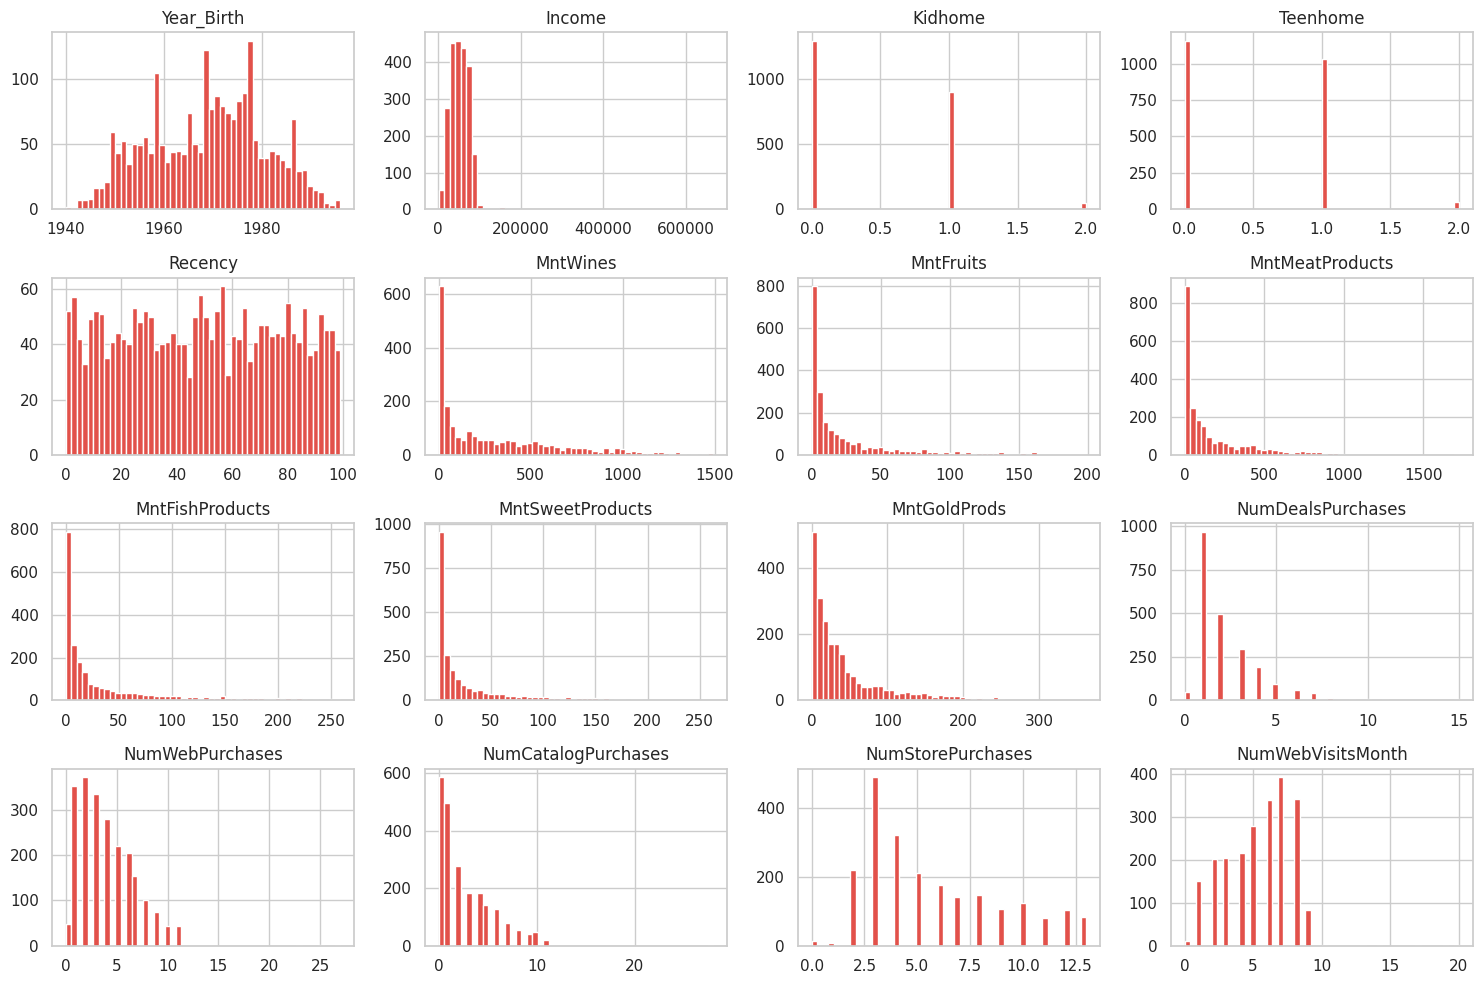

In [12]:
# Menyimpan Nama Fitur Numerik
numeric = df_to_plot.columns

# Histogram Semua Fitur Numerik
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

**Summary Insight — Distribusi Fitur Numerik**

*   Mayoritas fitur pengeluaran menunjukkan right-skewed distribution, di mana sebagian kecil customer menyumbang nilai belanja yang sangat tinggi.
*   Hal ini mengindikasikan adanya segmen high-spending customers yang penting untuk strategi retensi dan loyalitas.
*   Fitur jumlah transaksi dan channel pembelian juga tidak simetris, mencerminkan perbedaan tingkat engagement antar customer.
*   Distribusi Recency yang bervariasi menunjukkan perbedaan tingkat aktivitas customer.


# **Campaign Response Insight**

In [13]:
# Fungsi barPerc() - Persentase di Barplot
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])


    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])


        # 3. Print the percentage on the bars
        for bar in hueBars:
          height = bar.get_height()
          if height > 0 and total > 0:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    height + 0.5,
                    f'{height/total:.0%}',
                    ha="center", va="bottom", fontsize=9)

In [14]:
# Response Label
df['Response_Label'] = df['Response'].map({0: 'Not Accepted', 1: 'Accepted Campaign'})

df['Response_Label'] = pd.Categorical(df['Response_Label'], categories=['Not Accepted', 'Accepted Campaign'], ordered=True)

## **Customer Age**

<Axes: xlabel='Customer_Age', ylabel='Count'>

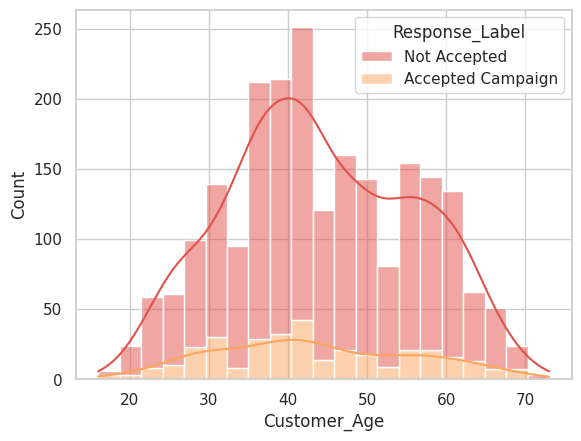

In [15]:
# Menghitung usia customer
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

# Visualisasi distribusi usia customer berdasarkan response campaign
sns.histplot(data=df, x='Customer_Age', hue='Response_Label', multiple='stack', kde=True)

**Key Insight - Customer Age:**

Pelanggan berusia 35-50 tahun merupakan kelompok dengan respons campaign paling tinggi, sementara pelanggan di bawah 25 tahun dan di atas 65 tahun menunjukkan tingkat respons campaign yang jauh lebih rendah, sehingga efektivitas campaign terutama didorong oleh segmen usia produktif.



## **Education**

In [16]:
# Melihat kategori unik pada variabel Education
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

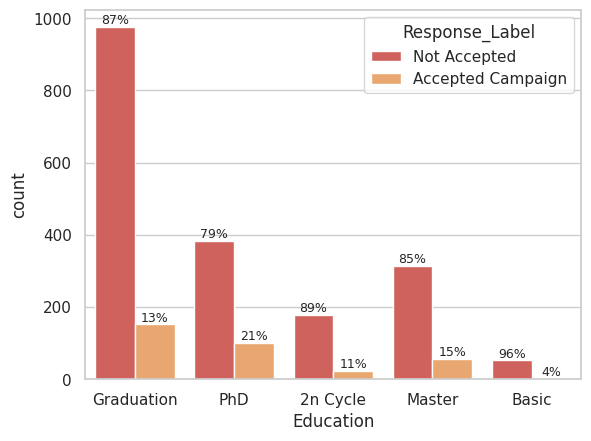

In [17]:
# Visualisasi distribusi tingkat pendidikan berdasarkan response campaign
ax = sns.countplot(data=df, x='Education', hue='Response_Label')
barPerc(df, 'Education', ax)

(0.0, 175000.0)

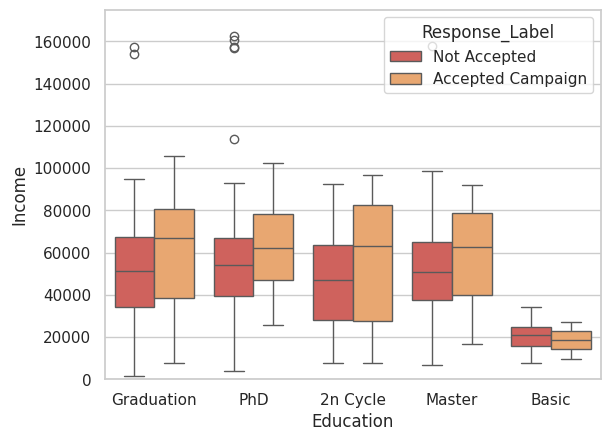

In [18]:
# Visualisasi distribusi income berdasarkan tingkat pendidikan dan response campaign
sns.boxplot(data=df, x='Education', y='Income', hue='Response_Label')
plt.ylim(0, 175000)

**Key Insight - Education:**

Pelanggan dengan tingkat pendidikan yang lebih tinggi (PhD, Master, dan Graduation) memiliki tingkat income yang lebih besar dan cenderung menunjukkan respons campaign yang lebih tinggi, yang menegaskan bahwa kombinasi antara latar belakang pendidikan dan daya beli berperan penting dalam meningkatkan peluang respons terhadap campaign.


## **Marital Status**

In [19]:
# Melihat kategori unik pada variabel Marital_Status
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [20]:
# Menggabungkan kategori (YOLO, Alone, Absurd) ke dalam kategori 'Single'
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

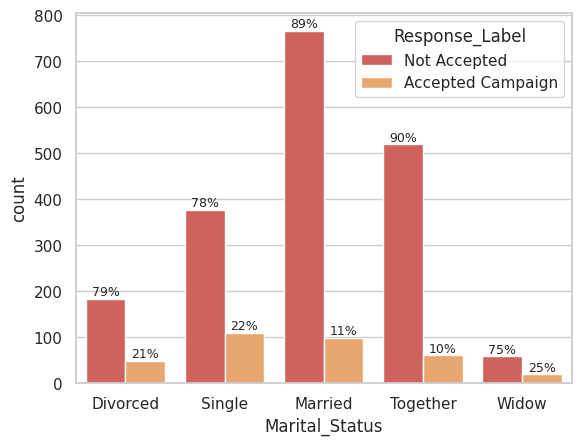

In [21]:
# Visualisasi distribusi status pernikahan berdasarkan response campaign
ax = sns.countplot(data=df, x='Marital_Status', hue='Response_Label')
barPerc(df, 'Marital_Status', ax)

**Key Insight - Marital Status**

Pelanggan dengan status yang menunjukkan kemandirian dalam rumah tangga (seperti Single dan Widow) cenderung memiliki tingkat respons yang lebih tinggi, menunjukkan bahwa kondisi rumah tangga dan kemandirian finansial berperan dalam keputusan untuk menerima penawaran campaign.

## **Income**

In [22]:
# Membagi variabel Income ke dalam 3 kelompok (Low, Middle, High)
df['Income_Band'], bins = pd.qcut(df['Income'], q=3, labels=['Low', 'Middle', 'High'], retbins=True)

# Membuat tabel ringkasan rentang income untuk setiap kategori
income_ranges = pd.DataFrame({'Income_Band': ['Low', 'Middle', 'High'], 'Min_Income': bins[:-1].astype(int), 'Max_Income': bins[1:].astype(int)})
income_ranges

,Income_Band,Min_Income,Max_Income
0,Low,1730,40492
1,Middle,40492,62846
2,High,62846,666666


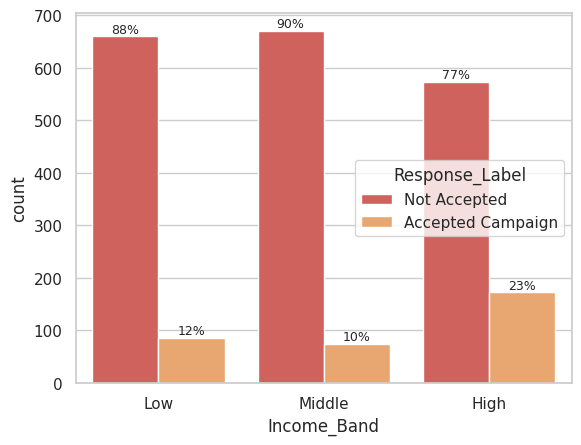

In [23]:
# Visualisasi distribusi kelompok income berdasarkan response campaign
ax = sns.countplot(data=df, x='Income_Band', hue='Response_Label')
barPerc(df, 'Income_Band', ax)

**Key Insight - Income:**

Pelanggan dengan penghasilan tinggi menunjukkan tingkat respons campaign tertinggi dibandingkan kelompok middle dan low income, menegaskan bahwa daya beli merupakan faktor kunci dalam mendorong pelanggan untuk menerima campaign.




## **Dependents (Kidhome + Teenhome)**

In [24]:
# Menghitung total tanggungan rumah tangga (Kidhome + Teenhome)
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']
df.Num_Dependants.unique()

array([0, 1, 2, 3])

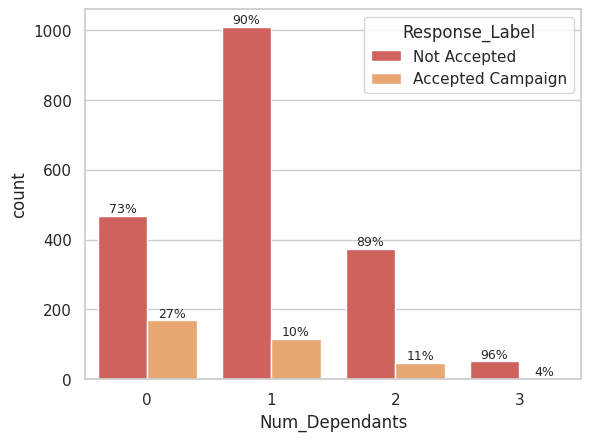

In [25]:
# Visualisasi distribusi jumlah tanggungan berdasarkan response campaign
ax = sns.countplot(data=df, x='Num_Dependants', hue='Response_Label')
barPerc(df, 'Num_Dependants', ax)

**Key Insight - Dependents:**

Pelanggan tanpa tanggungan menunjukkan tingkat penerimaan campaign tertinggi. Seiring bertambahnya jumlah tanggungan, tingkat respons campaign menurun secara signifikan. Hal ini mengindikasikan bahwa semakin besar jumlah tanggungan, semakin kecil kemungkinan pelanggan untuk merespons campaign.

## **Customer Join Date**

In [26]:
# Mengekstrak bulan dan tahun dari tanggal pendaftaran pelanggan
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

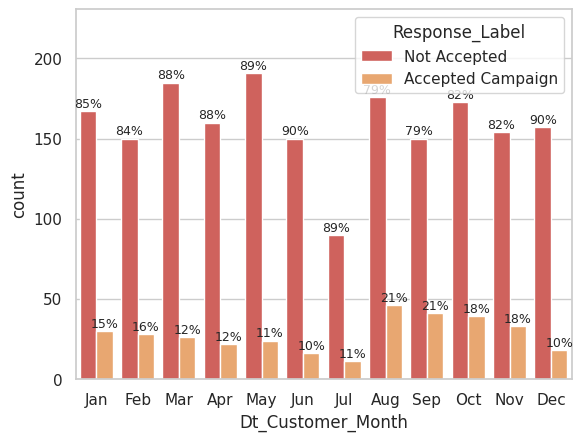

In [27]:
# Visualisasi distribusi pelanggan berdasarkan bulan pendaftaran dan response campaign
import calendar

ax = sns.countplot(data=df, x='Dt_Customer_Month', hue='Response_Label')
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
ax.set_ylim(0, ax.get_ylim()[1] * 1.15)
barPerc(df, 'Dt_Customer_Month', ax)

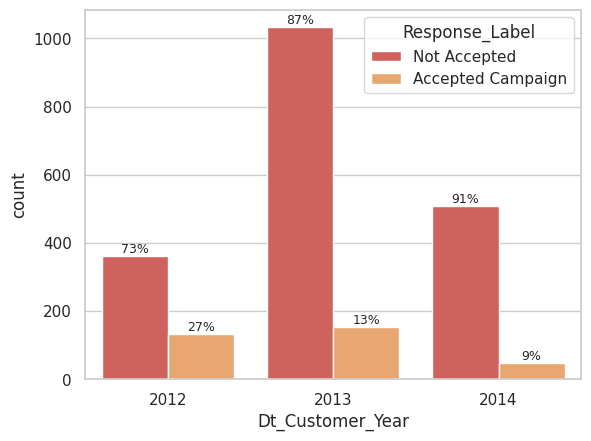

In [28]:
# Visualisasi distribusi pelanggan berdasarkan tahun pendaftaran dan response campaign
ax = sns.countplot(data=df, x='Dt_Customer_Year', hue='Response_Label')
barPerc(df, 'Dt_Customer_Year', ax)

**Key Insight - Customer Date Join:**

Pelanggan yang bergabung pada periode Agustus-Oktober maupun pelanggan yang mulai berlangganan sejak tahun 2012 cenderung menunjukkan tingkat respons campaign yang lebih tinggi dibandingkan periode lainnya. Pola ini menunjukkan bahwa baik waktu awal bergabung dan lamanya hubungan pelanggan berperan dalam meningkatkan peluang respons terhadap campaign.

## **Recency**

<Axes: xlabel='Recency', ylabel='Count'>

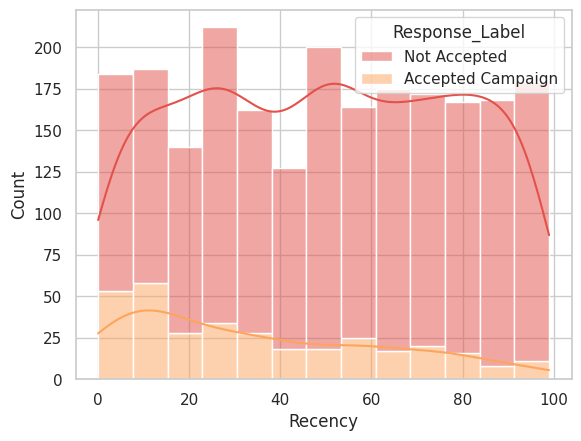

In [29]:
# Visualisasi distribusi recency
sns.histplot(data=df, x='Recency', hue='Response_Label', multiple='stack', kde=True)

**Key Insight - Recency:**

Pelanggan yang baru saja melakukan transaksi cenderung memberikan respons lebih tinggi terhadap campaign dibandingkan mereka yang sudah lama tidak berinteraksi. Hal ini menegaskan bahwa recency merupakan faktor utama dalam menentukan efektivitas campaign.

## **Amount Spent Features**

In [30]:
# Mengidentifikasi fitur pengeluaran yang merepresentasikan total belanja per kategori produk
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')

# Menghitung korelasi antara pengeluaran per kategori dan response campaign
df[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

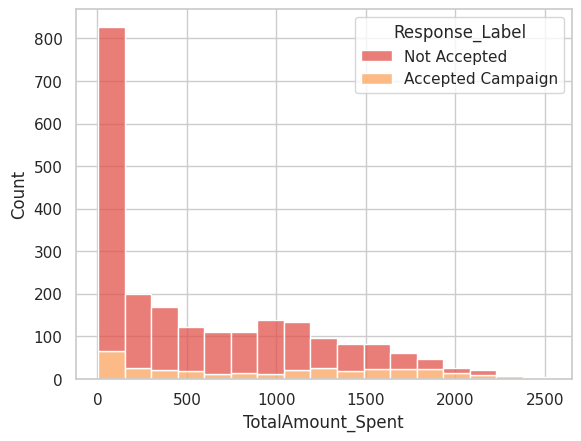

In [31]:
# Menghitung total pengeluaran pelanggan dari seluruh kategori produk
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)]
df['TotalAmount_Spent'] = df[amt_spent_features].sum(axis=1)

# Visualisasi distribusi total pengeluaran berdasarkan response campaign
sns.histplot(data=df, kde=False, x='TotalAmount_Spent', hue='Response_Label', multiple='stack')

**Key Insight - Amount Spent Features:**

Pelanggan dengan total belanja yang tinggi, terutama pada kategori wines dan meat products, cenderung lebih responsif terhadap campaign. Sebaliknya, pelanggan dengan total belanja yang rendah sering tidak merespons. Oleh karena itu, riwayat belanja dapat dijadikan dasar penting dalam menentukan target pelanggan dan alokasi anggaran campaign.

## **Purchase Behavior**

In [32]:
# Mengidentifikasi fitur yang merepresentasikan jumlah transaksi per channel pembelian
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
purchase_feature.append('Response')

# Menghitung korelasi antara aktivitas pembelian per channel dan response campaign
df[purchase_feature].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


<Axes: xlabel='Total_Purchases', ylabel='Count'>

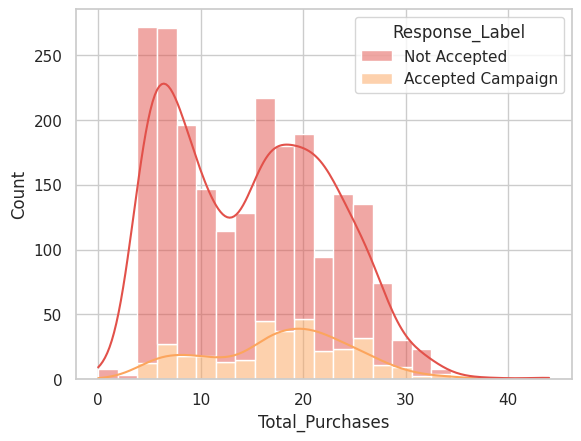

In [33]:
# Menghitung total jumlah transaksi pelanggan dari seluruh channel pembelian
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
df['Total_Purchases'] = df[purchase_feature].sum(axis=1)

# Visualisasi distribusi total transaksi berdasarkan response campaign
sns.histplot(data=df, kde=True, x='Total_Purchases', hue='Response_Label', multiple='stack')

**Key Insight - Purchase Behavior:**

Respons campaign lebih tinggi pada pelanggan yang lebih sering berbelanja, khususnya melalui kanal katalog dan website. Sebaliknya, pelanggan dengan aktivitas belanja rendah cenderung tidak merespons. Hal ini menunjukkan bahwa intensitas pembelian serta penggunaan kanal katalog dan digital merupakan faktor penting dalam menentukan prioritas target campaign.

## **Web Visits**

In [34]:
# Menghitung korelasi antara jumlah kunjungan web per bulan dengan response campaign
df[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


**Key Insight - Web Visits:**

Jumlah kunjungan website tidak memiliki hubungan yang kuat dengan respons campaign. Ini menunjukkan bahwa tingginya traffic tidak secara otomatis meningkatkan respons, sehingga data kunjungan kurang efektif sebagai dasar utama penentuan target campaign.

## **Previous Campaign Acceptance**

In [35]:
# Mengidentifikasi fitur campaign sebelumnya (AcceptedCmp*) yang menunjukkan apakah pelanggan menerima campaign tertentu
prev_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')

# Menghitung korelasi antara masing-masing respons campaign sebelumnya dengan respons campaign saat ini
df[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


**Key Insight - Previous Campaign Acceptance:**

Pelanggan yang sebelumnya pernah merespons campaign, khususnya pada Campaign 5 dan Campaign 1, cendrung lebih besar kemungkinannya untuk kembali merespons pada campaign berikutnya. Hal ini menunjukkan bahwa minat pelanggan relatif konsisten dari satu campaign ke campaign lainnya. Oleh karena itu, riwayat respons pelanggan dapat dijadikan acuan utama dalam menentukan prioritas target campaign.

## **Complain**

In [36]:
# Menghitung korelasi antara status komplain pelangan dengan response campaign
df[['Complain', 'Response']].corr()[['Response']]

,Response
Complain,0.000185
Response,1.000000


**Key Insight - Complain:**

Status komplain pelanggan tidak berpengaruh terhadap respons campaign. Artinya, pernah atau tidaknya pelanggan menyampaikan komplain tidak memengaruhi apakah mereka akan merespons campaign.

## **Country**

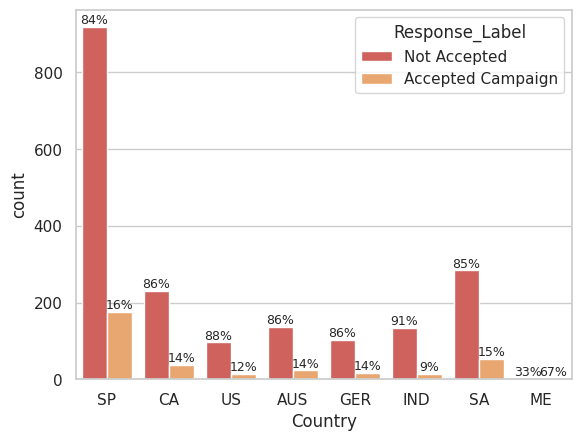

In [37]:
# Visualisasi distribusi negara berdasarkan response campaign
ax = sns.countplot(data=df, x='Country', hue='Response_Label')
barPerc(df, 'Country', ax)

**Key Insight - Country:**

Terdapat perbedaan tingkat respons campaign antar negara. ME menjadi wilayah dengan respons tertinggi, sementara IND dan US menunjukkan hasil yang lebih rendah. Hal ini menunjukkan bahwa lokasi pelanggan berperan penting dalam efektivitas campaign, sehingga strategi targeting dan alokasi anggaran perlu disesuaikan untuk setiap negara.  

# **Modelling**

## **Data Preprocessing & Feature Engineering**

In [38]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/Datasets Collection/marketing_data.csv')

# Import fungsi split
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi 60% train, 20% validation, dan 20% test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Output shape
df_train.shape, df_valid.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

In [39]:
# Menghilangkan spasi pada nama kolom
df_train.columns = df_train.columns.str.replace(' ', '')
df_valid.columns = df_valid.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

# Membersihkan kolom Income (Hapus $ dan ,)
for d in [df_train, df_valid, df_test]:
  d['Income'] = (
      d['Income']
      .astype(str)
      .str.replace('$', '', regex=False)
      .str.replace(',', '', regex=False)
      .astype(float)
  )

# Konversi kolom tanggal jadi datetime
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])
df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])
df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

# Mengisi missing value Income dengan median
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].median())

# Menghapus data tidak realistis (Year_Birtth <= 1900)
df_train = df_train[df_train['Year_Birth'] > 1900].reset_index(drop=True)
df_valid = df_valid[df_valid['Year_Birth'] > 1900].reset_index(drop=True)
df_test = df_test[df_test['Year_Birth'] > 1900].reset_index(drop=True)

# Menghitung umur customer
df_train['Customer_Age']  = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Customer_Age']  = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Customer_Age']  = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

# Menggabungkan kategori (YOLO, Alone, Absurd) ke dalam kategori 'Single'
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

# Menghitung total tanggungan rumah tangga (Kidhome + Teenhome)
df_train['Num_Dependants'] = df_train['Kidhome'] + df_train['Teenhome']
df_valid['Num_Dependants'] = df_valid['Kidhome'] + df_valid['Teenhome']
df_test['Num_Dependants'] = df_test['Kidhome'] + df_test['Teenhome']

# Mengekstrak bulan dan tahun dari tanggal pendaftaran pelanggan
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year

df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

# Menjumlahkan total uang yang dibelanjakan di semua kategori
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df_train['TotalAmount_Spent'] = df_train[amt_spent_features].sum(axis=1)
df_valid['TotalAmount_Spent'] = df_valid[amt_spent_features].sum(axis=1)
df_test['TotalAmount_Spent'] = df_test[amt_spent_features].sum(axis=1)

# Menjumlahkan seluruh jumlah transaksi di semua channel
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
df_train['Total_Purchases'] = df_train[purchase_feature].sum(axis=1)
df_valid['Total_Purchases'] = df_valid[purchase_feature].sum(axis=1)
df_test['Total_Purchases'] = df_test[purchase_feature].sum(axis=1)

In [40]:
# Mengambil semua kolom yang berkaitan dengan campaign yang diterima pelanggan
cmp_feat = [c for c in df.columns if 'AcceptedCmp' in str(c)]

# Mengambil semua kolom yang berkaitan dengan total pengeluaran
mnt_feat = [c for c in df.columns if 'Mnt' in str(c)]

# Mengambil semua kolom yang berkaitan dengan jumlah transaksi
num_feat = [c for c in df.columns if 'Num' in str(c)]

# Daftar fitur numerik utama yang digunakan dalam analisis dan pemodelan
numeric_feat = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
                'Num_Dependants', 'Dt_Customer_Month', 'Dt_Customer_Year',
                'TotalAmount_Spent', 'Total_Purchases']

# Menggabungkan seluruh fitur numerik untuk kebutuhan modeling
all_numeric_feat = cmp_feat + mnt_feat + numeric_feat

In [41]:
# Menentukan kolom mana yang diperlakukan sebagai categorical features
categoric_feat = ['Education', 'Marital_Status', 'Country']

# Menggabungkan seluruh fitur kategorikal dan numerik untuk modeling
all_feat = categoric_feat + all_numeric_feat

# Membuat dataframe final khusus fitur
df_train_final = df_train[all_feat]
df_valid_final = df_valid[all_feat]
df_test_final = df_test[all_feat]

In [42]:
# Mendefinisikan mapping numerik untuk fitur Education agar kategori pendidikan bisa direpresentasikan sebagai angka
education = {'Basic':1, 'Graduation':2, '2n Cycle':3, 'Master':4, 'PhD':5}

# Menerapkan mapping Education pada dataset train, validation, dan test
df_train_final['Education'] = df_train_final['Education'].map(education)
df_valid_final['Education'] = df_valid_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

In [43]:
# Import DictVectorizer dari scikit-learn untuk mengubah data kategorikal menjadi numerik (one-hot encoding)
from sklearn.feature_extraction import DictVectorizer

# Membuat instance DictVectorizer agar hasilnya menjadi array dense
dv = DictVectorizer(sparse=False)

# Mengubah dataframe train, validation, dan test menjadi list of dictionaries
df_train_final_dicts = df_train_final.to_dict(orient='records')
df_valid_final_dicts = df_valid_final.to_dict(orient='records')
df_test_final_dicts = df_test_final.to_dict(orient='records')

# Menerapkan one-hot encoding pada data train dan menyesuaikan encoder
df_train_final_dicts = dv.fit_transform(df_train_final_dicts)

# Transformasi data validation dan test menggunakan encoder yang sama
df_valid_final_dicts = dv.transform(df_valid_final_dicts)
df_test_final_dicts = dv.transform(df_test_final_dicts)

# Mendapatkan nama-nama fitur setelah one-hot encoding
feature_names = dv.get_feature_names_out()

# Mengubah array hasil transformasi kembali menjadi dataframe dengan nama kolom lengkap
df_train_final = pd.DataFrame(df_train_final_dicts, columns=feature_names)
df_valid_final = pd.DataFrame(df_valid_final_dicts, columns=feature_names)
df_test_final  = pd.DataFrame(df_test_final_dicts,  columns=feature_names)

In [44]:
# Menetapkan feature matrix x (independent variable)
x_train_final = df_train_final
x_valid_final = df_valid_final
x_test_final = df_test_final

# Menetapkan target variable y (dependent variable (target variable)) --> response
y_train_final = df_train.Response
y_valid_final = df_valid.Response
y_test_final = df_test.Response

## **Logistic Regression Model**

In [45]:
# Import model Logistic Regression untuk baseline classification
from sklearn.linear_model import LogisticRegression

# Import metrik ROC-AUC untuk evaluasi performa model klasifikasi biner
from sklearn.metrics import roc_auc_score

In [46]:
# Inisialisasi Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Training model
lr_model.fit(x_train_final, y_train_final)

LogisticRegression(random_state=42)

In [47]:
# Menghasilkan probabilitas prediksi pada data validation
y_valid_pred_lr = lr_model.predict_proba(x_valid_final)[:,1]

In [48]:
# Menghitung nilai ROC-AUC pada data validation
print('LogisticRegression ROCAUC Result:', roc_auc_score(y_valid_final, y_valid_pred_lr).round(3))

LogisticRegression ROCAUC Result: 0.745


In [49]:
# Menggabungkan data train dan validation
x_full_train_final = pd.concat([x_train_final, x_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

# Menjalankan fitting Logistic Regression pada full training data
lr_final_model = LogisticRegression(random_state=42)
lr_final_model.fit(x_full_train_final, y_full_train_final)

LogisticRegression(random_state=42)

In [50]:
# Menghasilkan probabilitas prediksi pada data test
y_test_pred_lr = lr_final_model.predict_proba(x_test_final)[:,1]

In [51]:
# Menghitung ROC-AUC pada data test
print('LogisticRegression ROCAUC Result:', roc_auc_score(y_test_final, y_test_pred_lr).round(3))

LogisticRegression ROCAUC Result: 0.751


## **Random Forest Model**

In [52]:
# Import Random Forest Classifier untuk model non-linear berbasis ensemble
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Inisialisasi Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Training model
rf_model.fit(x_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [54]:
# Menghasilkan probabilitas prediksi pada data validation
y_valid_pred_rf = rf_model.predict_proba(x_valid_final)[:,1]

In [55]:
# Menghitung dan menampilkan nilai ROC-AUC pada data validation
print('RandomForest ROCAUC Result:', roc_auc_score(y_valid_final, y_valid_pred_rf).round(3))

RandomForest ROCAUC Result: 0.859


In [56]:
# Menjalankan fitting RandomForest pada full training data
rf_final_model = RandomForestClassifier(random_state=42)
rf_final_model.fit(x_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [57]:
# Menghasilkan probabilitas prediksi pada data test
y_test_pred_rf = rf_final_model.predict_proba(x_test_final)[:, 1]

In [58]:
# Menghitung ROC-AUC pada data test
print('RandomForest ROCAUC Result:', roc_auc_score(y_test_final, y_test_pred_rf).round(3))

RandomForest ROCAUC Result: 0.868


## **Model Performance Summary**

**1. Logistic Regression Model**
    
    - Validation ROC-AUC  : 0.745
    - Test ROC-AUC        : 0.751

Logistic regression memberikan hasil yang cukup konsisten, tetapi akurasinya masih tergolong sedang. Artinya, model ini bisa membantu, namun belum optimal untuk memisahkan pelanggan yang berpotensi merespons dan yang tidak.

**2. Random Forest Model**
    
    - Validation ROC-AUC  : 0.859
    - Test ROC-AUC        : 0.868

Random forest menunjukkan hasil yang jauh lebih baik dan lebih stabil. Model ini lebih andal dalam mengidentifikasi pelanggan yang kemungkinan besar akan merespons campaign.

**Kesimpulan:**

Random forest adalah pilihan yang lebih tepat karena memberikan prediksi yang lebih akurat dan dapat diandalkan untuk mendukung pengambilan keputusan campaign.




## **Interpretation**

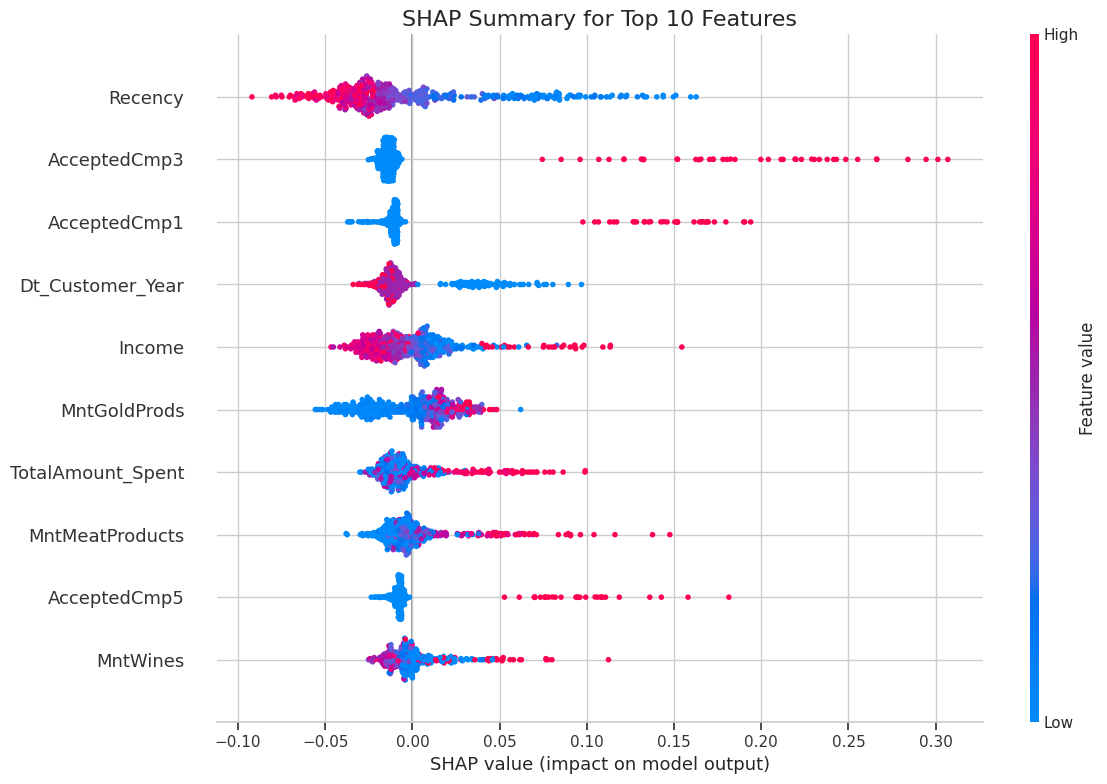

In [59]:
# Import SHAP untuk melakukan interpretasi model
import shap

# Membuat SHAP explainer khusus untuk model Random Forest
explainer_rf = shap.TreeExplainer(rf_final_model)

# Menghitung nilai SHAP pada data test
shap_values_rf = explainer_rf.shap_values(x_test_final)

# Membuat SHAP summary plot untuk menampilkan 10 fitur teratas dengan dampak terbesar terhadap prediksi
plt.title('SHAP Summary for Top 10 Features', size=16)
shap.summary_plot(shap_values_rf[:, :, 1], x_test_final, max_display=10, plot_size=[12,8])

## **SHAP Interpretation - Key Drivers of Campaign Response**

- **Recency:** Pelanggan yang baru melakukan transaksi memiliki peluang respons yang jauh lebih tinggi dibandingkan pelanggan yang sudah lama tidak berbelanja.
- **AcceptedCmp1, AcceptedCmp3, AcceptedCmp5:** Riwayat respons pada campaign sebelumnya meningkatkan kemungkinan pelanggan untuk kembali merespons, sehingga segmen ini sangat relevan untuk targeting.
- **Dt_Customer_Year:** Pelanggan yang telah bergabung lebih lama cenderung menunjukkan tingkat keterlibatan yang lebih tinggi terhadap campaign.
- **Income dan TotalAmount_Spent:** Pelanggan dengan pendapatan dan total belanja yang lebih besar secara konsisten memiliki peluang respons yang lebih tinggi.
- **Wines, MeatProducts, GoldProducts:** Aktivitas belanja pada kategori ini berkaitan erat dengan keberhasilan campaign.

# **Campaign Strategy Recommendation**

iFood disarankan untuk mengalihkan pendekatan campaign dari menjangkau sebanyak mungkin pelanggan menjadi fokus pada pelanggan yang memiliki potensi terbesar untuk memberikan hasil bisnis.

Campaign perlu diarahkan pada pelanggan dengan peluang respons tertinggi, yaitu mereka yang:
- Baru saja melakukan pembelian
- Memiliki total belanja yang tinggi, khususnya pada produk premium seperti wines, meat, dan gold
- Pernah memberikan respons positif terhadap campaign sebelumnya
- Memiliki daya beli yang lebih kuat serta tanggungan yang relatif sedikit
- Aktif bertransaksi melalui kanal katalog dan website

Di sisi lain, upaya campaign sebaiknya dikurangi pada pelanggan yang:
- Sudah lama tidak melakukan transaksi
- Memiliki riwayat belanja yang rendah
- Sering mengunjungi website namun jarang melakukan pembelian

Dengan mengarahkan campaign pada segmen yang lebih tepat, iFood berpotensi meningkatkan efektivitas campaign, menekan biaya per hasil, serta menghasilkan pendapatan yang lebih besar dari setiap pelanggan yang ditargetkan.

# **Business Conclusion**

Hasil analisis menunjukkan bahwa keberhasilan campaign lebih ditentukan oleh ketepatan dalam memilih pelanggan dibandingkan dengan jumlah pelanggan yang dihubungi.

Dengan memprioritaskan pelanggan yang paling berpeluang merespons dan memiliki nilai belanja yang lebih tinggi, iFood dapat:
- Menggunakan anggaran campaign secara lebih efisien
- Meningkatkan kontribusi pendapatan dari setiap aktivitas campaign
- Mengurangi pemborosan pada segmen pelanggan dengan potensi yang lebih rendah

Pendekatan ini menjadikan campaign bukan sekadar aktivitas pemasaran massal, tetapi sebagai instrumen strategis untuk mendorong pertumbuhan pendapatan yang lebih terarah dan berkelanjutan.